# K-Means Clusters and California Housing Prices
We will be using the following Kaggle dataset on California housing prices: https://www.kaggle.com/datasets/camnugent/california-housing-prices/
& use K-Means clusters to take a look at some different regions in California with regard to their housing prices.

As spatial features,'Latitude' and 'Longitude' make good candidates for k-means clustering. In this example we'll cluster these with median income to create economic segments in different regions of California.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [24]:
# Create cluster feature
kmeans = KMeans(n_clusters=6, n_init=10)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,1


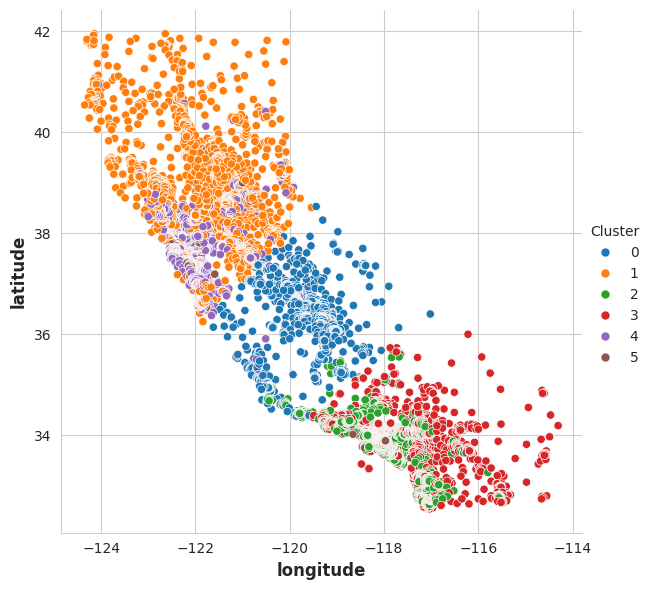

In [33]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6
);

In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


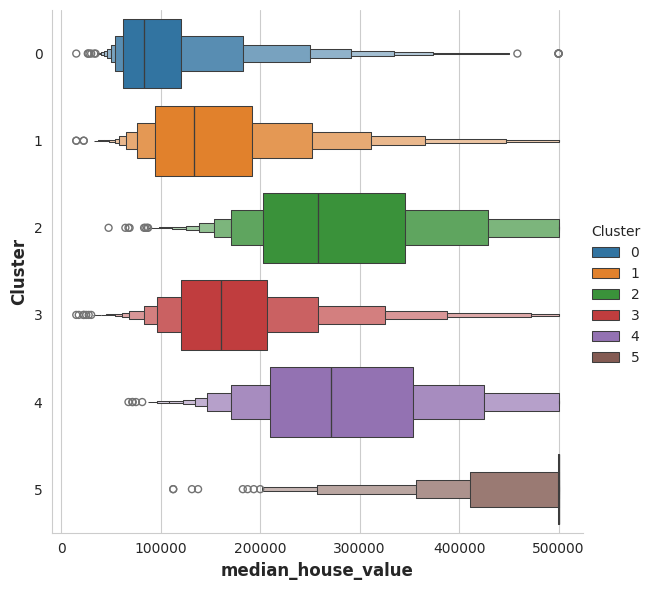

In [29]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6, hue="Cluster");


Let's hone in on Cluster 5, the wealthiest by median house value, on the original map by filtering on the original dataframe.

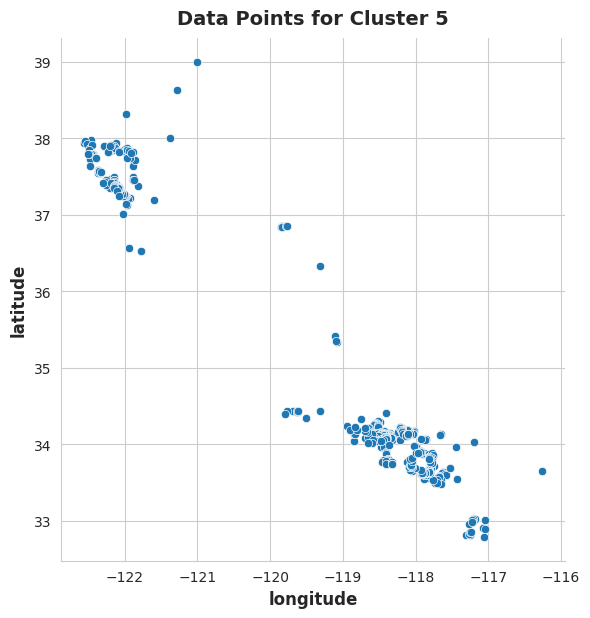

In [34]:
# Filter data for Cluster 5
cluster_5_data = X[X["Cluster"] == 5]

sns.relplot(
    x="longitude", y="latitude", data=cluster_5_data, height=6
)
plt.title("Data Points for Cluster 5")
plt.show()


If we know a little bit about California's geography, we can deduce which neighborhoods these latitude/longitude coordinates belong to. 

In [35]:
cluster_5_data.head()

,median_income,latitude,longitude,Cluster,median_house_value
131,11.6017,37.84,-122.19,5,392600.0
409,10.0825,37.90,-122.28,5,397000.0
510,11.8603,37.82,-122.22,5,500001.0
511,13.4990,37.82,-122.22,5,500001.0
512,12.2138,37.82,-122.23,5,500001.0


Plugging some of these coordinates into Google Maps we see that some of these belong to Piedmont, California. Some others are places like Palo alto. Both are in the Bay Area- Piedmont with an average home value of [$2.2 million](https://www.compass.com/neighborhood-guides/sf/piedmont/) . The Bay Area in general has higher median house values as it is the site of [Silicon Valley](https://en.wikipedia.org/wiki/Silicon_Valley). Now, this data set we have on hand is from 1990- so you'll see the house values above are between 390K-500K but that is back then. 

The really wealthy area in SoCal are places like Hollywood, Bel-Air, Rancho Palos Verdes, etc. Altogether, cluster 5 is the upper crust of the upper crust. We can do similarly with Cluster 4 to see a little better.

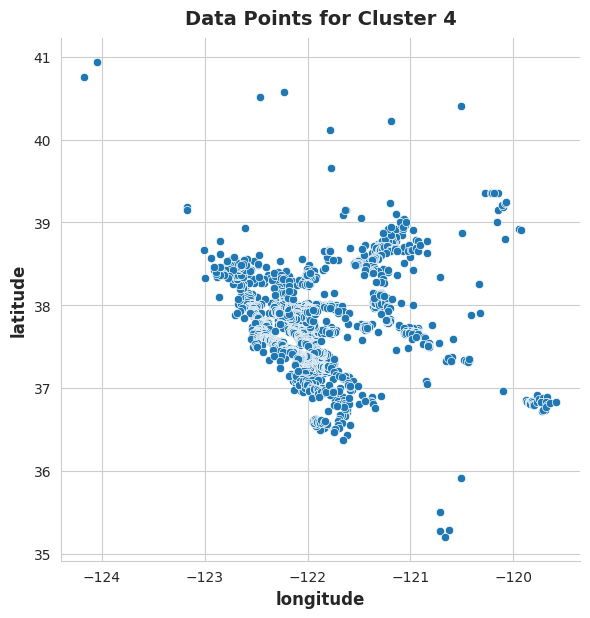

In [37]:
# Filter data for Cluster 5
cluster_4_data = X[X["Cluster"] == 4]

sns.relplot(
    x="longitude", y="latitude", data=cluster_4_data, height=6
)
plt.title("Data Points for Cluster 4")
plt.show()

Cluster 4 has the Bay area (San Francisco) written all over it. 

We can reduce the number of clusters if we want too, however when we do, I think the results don't look as nice.